# Importar librerias y cargar datos de prueba

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=100, centers=4,n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [8]:
# Creamos el DataFrame

df_blobs = pd.DataFrame({
    "x1": x[:,0], # Primera Columna
    "x2": x[:,1], #Segunda Columna
    "y":y 
    }
)

df_blobs 

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [10]:
# Funcion para dibujar nuestros datos

def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()
    for i in y_uniques:
        x[y==i].plot(
            title=f"{len(y_uniques)} Clusters",
            kind="scatter",
            x="x1",
            y="x2",
            marker = f"${i}$",
            ax = ax

        )

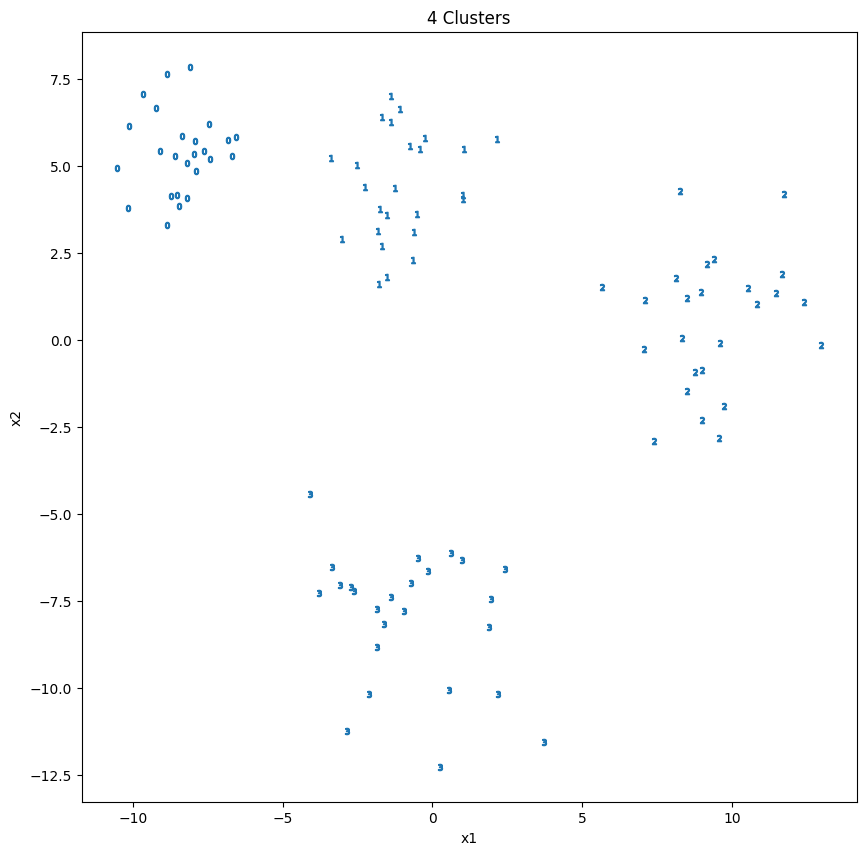

In [17]:
# Testear la funcion de grafica

fig , ax = plt.subplots(1,1,figsize=(10,10))

x , y = df_blobs[["x1","x2"]], df_blobs["y"]

plot_2d_clusters(x,y,ax)


# Aplicando clustering

In [18]:
from sklearn.cluster import KMeans

In [19]:
# Creamos el modelo de clustering, con 4 clusters (n_clusters=4), sabemos que son 4 por los datos en y
kmeans = KMeans(n_clusters=4, random_state= 7)

In [24]:
# Entrenar modelo
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'KMeans 4 Clusters')

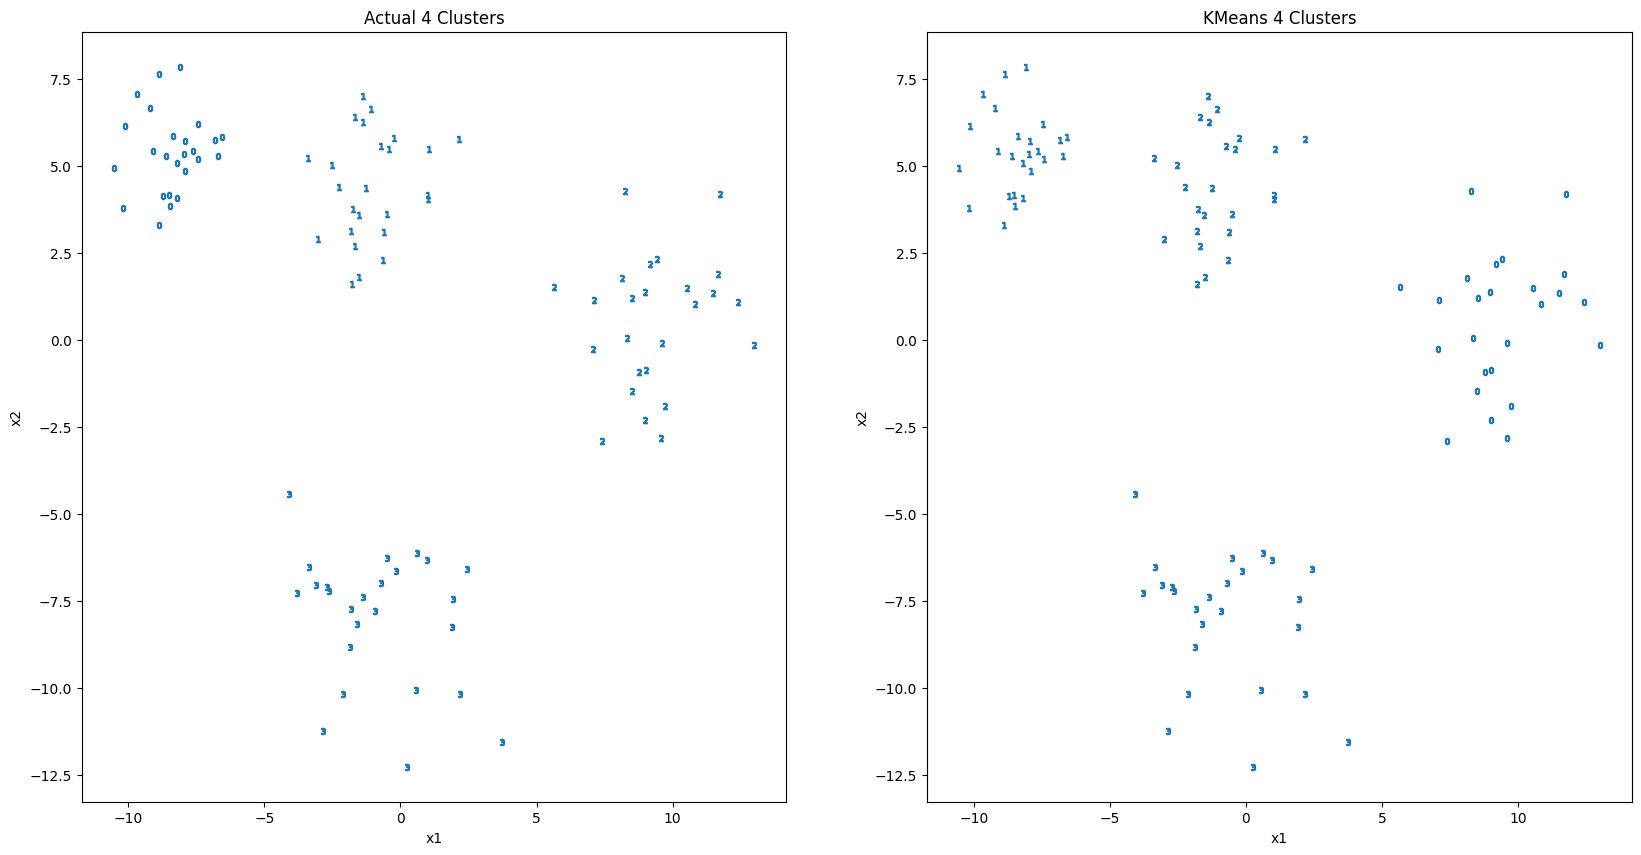

In [35]:
# Visualizar datos

fig, ax = plt.subplots(1,2,figsize=(20,10))
plot_2d_clusters(x,y,ax[0])
plot_2d_clusters(x,y_pred,ax[1])

#Actualizamos los titulos
ax[0].set_title(f"Actual {ax[0].get_title()}")
ax[1].set_title(f"KMeans {ax[1].get_title()}")

